In [1]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [2]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy.stats import zscore as zscore
#To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
#Read the dataset file of train data
train=pd.read_csv("ml_case_training_data.csv")
#Read the dataset file of history data
history=pd.read_csv("ml_case_training_hist_data.csv")
#Read the dataset file of churn data
churn=pd.read_csv("ml_case_training_output.csv")

In [4]:
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [5]:
history.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [6]:
churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [7]:
train.tail()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,...,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392


In [8]:
history.tail()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [9]:
churn.tail()

,id,churn
16091,18463073fb097fc0ac5d3e040f356987,0
16092,d0a6f71671571ed83b2645d23af6de00,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,0
16095,563dde550fd624d7352f3de77c0cdfcd,0


In [10]:
train.shape

(16096, 32)

In [11]:
history.shape

(193002, 8)

In [12]:
churn.shape

(16096, 2)

In [13]:
train.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [14]:
history.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [15]:
churn.dtypes

id       object
churn     int64
dtype: object

In [16]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [17]:
history.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [18]:
churn.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [19]:
train.isnull().sum()

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele      12588
forecast_base_bill_year     12588
forecast_bill_12m           12588
forecast_cons               12588
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy      126
forecast_meter_rent_12m         0
forecast_price_energy_p1      126
forecast_price_energy_p2      126
forecast_price_pow_p1         126
has_gas                         0
imp_cons                        0
margin_gross_pow_ele           13
margin_net_pow_ele             13
nb_prod_act                     0
net_margin                     15
num_years_anti

In [20]:
history.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [21]:
churn.isnull().sum()

id       0
churn    0
dtype: int64

In [22]:
train.corr()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
campaign_disc_ele,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons_12m,NaN,1.000000,0.471233,0.919545,0.132991,0.132991,0.149023,0.133147,0.165168,0.139526,...,-0.033546,0.146758,-0.025418,0.139353,-0.065500,-0.045779,0.308567,0.120491,0.008810,0.102423
cons_gas_12m,NaN,0.471233,1.000000,0.447209,0.085733,0.085733,0.083604,0.076854,0.059525,0.057619,...,-0.022416,0.078456,-0.027193,0.060609,-0.016867,-0.008242,0.272005,0.058930,-0.008626,0.052365
cons_last_month,NaN,0.919545,0.447209,1.000000,0.136207,0.136207,0.134066,0.136816,0.129574,0.151476,...,-0.024242,0.123164,-0.020057,0.153861,-0.054114,-0.037696,0.350711,0.096424,0.004860,0.089565
forecast_base_bill_ele,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,0.958303,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_base_bill_year,NaN,0.132991,0.085733,0.136207,1.000000,1.000000,0.794776,0.964402,0.750961,0.958303,...,-0.223693,0.351376,0.106436,0.964402,-0.088898,-0.054790,0.051419,0.468836,0.021869,0.585426
forecast_bill_12m,NaN,0.149023,0.083604,0.134066,0.794776,0.794776,1.000000,0.751430,0.970487,0.797272,...,-0.258372,0.376494,0.147365,0.751430,-0.129388,-0.086826,0.050683,0.656937,0.029917,0.711502
forecast_cons,NaN,0.133147,0.076854,0.136816,0.964402,0.964402,0.751430,1.000000,0.758825,0.974419,...,-0.166692,0.290593,0.074713,1.000000,-0.111186,-0.075863,0.055135,0.489346,0.006925,0.457566
forecast_cons_12m,NaN,0.165168,0.059525,0.129574,0.750961,0.750961,0.970487,0.758825,1.000000,0.746076,...,-0.217315,0.245845,0.058169,0.725550,-0.184179,-0.141642,0.013283,0.768871,0.064431,0.583119
forecast_cons_year,NaN,0.139526,0.057619,0.151476,0.958303,0.958303,0.797272,0.974419,0.746076,1.000000,...,-0.206041,0.225691,0.053678,0.981732,-0.139177,-0.106576,0.013811,0.537701,0.066105,0.442228


In [23]:
history.corr()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
price_p1_var,1.000000,-0.329950,-0.595257,0.416443,-0.630465,-0.572522
price_p2_var,-0.329950,1.000000,0.828230,-0.099764,0.802757,0.814439
price_p3_var,-0.595257,0.828230,1.000000,-0.137346,0.973831,0.979617
price_p1_fix,0.416443,-0.099764,-0.137346,1.000000,0.000941,-0.251511
price_p2_fix,-0.630465,0.802757,0.973831,0.000941,1.000000,0.926955
price_p3_fix,-0.572522,0.814439,0.979617,-0.251511,0.926955,1.000000


In [24]:
churn.corr()

,churn
churn,1.0


In [25]:
attrition_count = churn['churn'].value_counts()
print('Total Number of Churned Customers:\n', attrition_count)

Total Number of Churned Customers:
 0    14501
1     1595
Name: churn, dtype: int64


In [26]:
attrition_rate = churn['churn'].value_counts() / churn.shape[0] * 100
print('Attrition rate: \n', attrition_rate)

Attrition rate: 
 0    90.090706
1     9.909294
Name: churn, dtype: float64


### Total 1595 customer churned and now 14501 customers are in attach . the rate of churn is 9.90% or the rate of active customer is 90.09%

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [28]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [29]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [30]:
missing_values_hist_perc = train.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)

Percentage of Missing Values:
 id                            0.000000
activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.0

In [31]:
missing_values_hist_perc = history.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)

Percentage of Missing Values:
 id              0.000000
price_date      0.000000
price_p1_var    0.704138
price_p2_var    0.704138
price_p3_var    0.704138
price_p1_fix    0.704138
price_p2_fix    0.704138
price_p3_fix    0.704138
dtype: float64


In [32]:
missing_values_hist_perc = churn.isnull().mean() * 100
print('Percentage of Missing Values:\n', missing_values_hist_perc)

Percentage of Missing Values:
 id       0.0
churn    0.0
dtype: float64


In [33]:
# Identify negative columns
neg_values = ['price_p1_fix','price_p2_fix','price_p3_fix']
history[neg_values] = history[neg_values].apply(abs)

history.head()


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [34]:
history.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325563,10.698210,6.455443
std,0.025117,0.050033,0.036335,5.437816,12.856039,7.782273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


<AxesSubplot:>

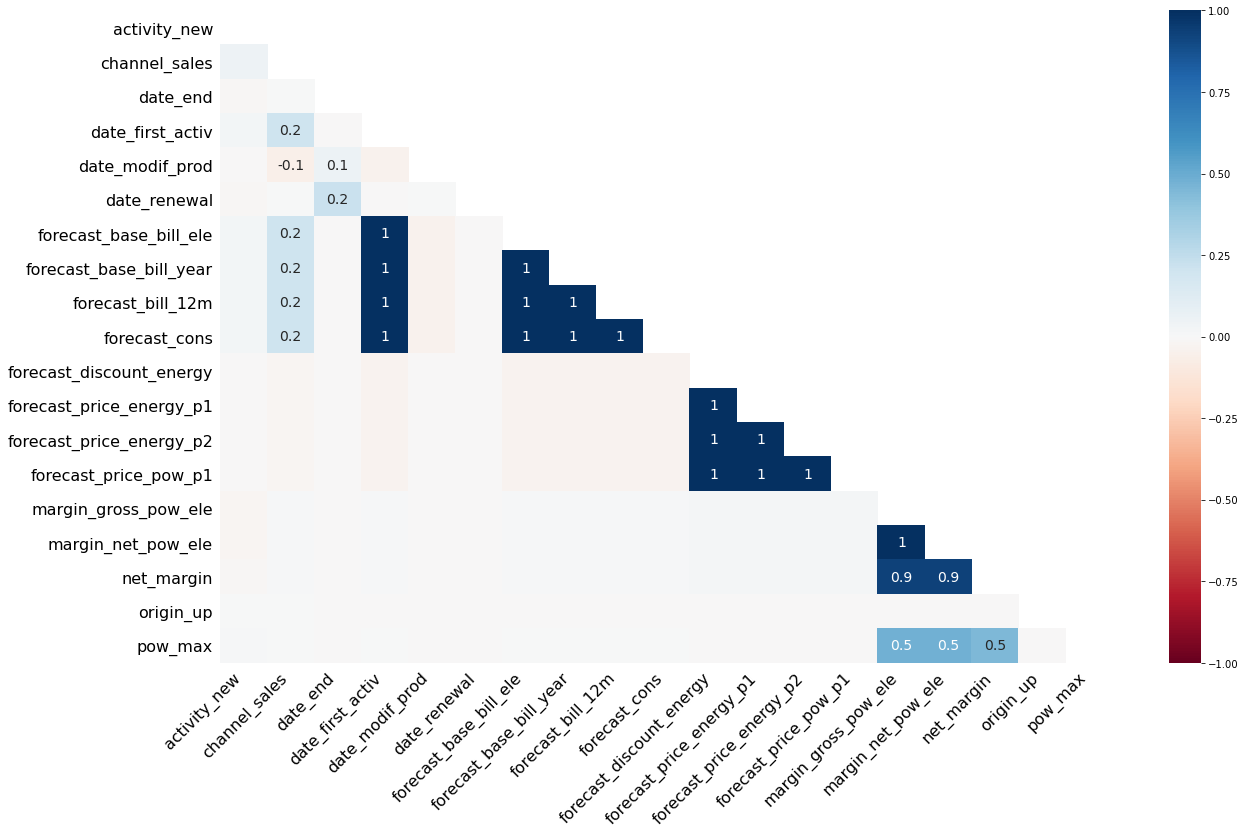

In [35]:
msno.heatmap(train)

<AxesSubplot:>

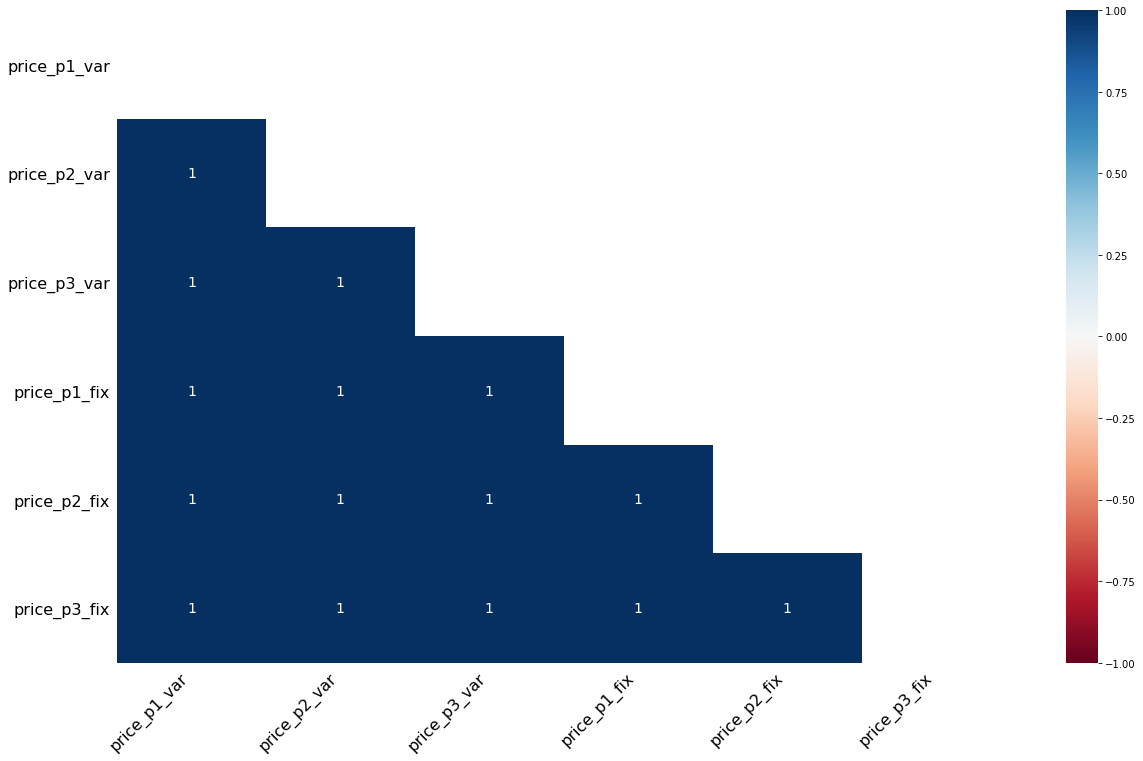

In [36]:
msno.heatmap(history)

In [37]:
# fill missing values with mean column values
history.fillna(history.mean(), inplace=True)
# count the number of NaN values in each column
print(history.isnull().sum())

id              0
price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64


In [38]:
# fill missing values with mean column values
train.fillna(train.mean(), inplace=True)
# count the number of NaN values in each column
print(train.isnull().sum())

id                              0
activity_new                 9545
campaign_disc_ele           16096
channel_sales                4218
cons_12m                        0
cons_gas_12m                    0
cons_last_month                 0
date_activ                      0
date_end                        2
date_first_activ            12588
date_modif_prod               157
date_renewal                   40
forecast_base_bill_ele          0
forecast_base_bill_year         0
forecast_bill_12m               0
forecast_cons                   0
forecast_cons_12m               0
forecast_cons_year              0
forecast_discount_energy        0
forecast_meter_rent_12m         0
forecast_price_energy_p1        0
forecast_price_energy_p2        0
forecast_price_pow_p1           0
has_gas                         0
imp_cons                        0
margin_gross_pow_ele            0
margin_net_pow_ele              0
nb_prod_act                     0
net_margin                      0
num_years_anti

<AxesSubplot:xlabel='churn', ylabel='count'>

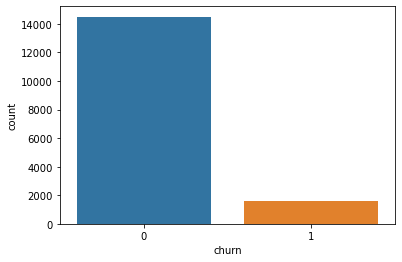

In [39]:
#Visualize churn count 
sns.countplot(churn['churn'])

<AxesSubplot:>

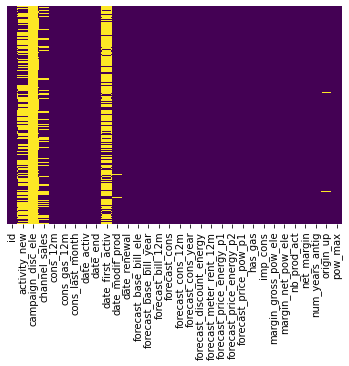

In [40]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

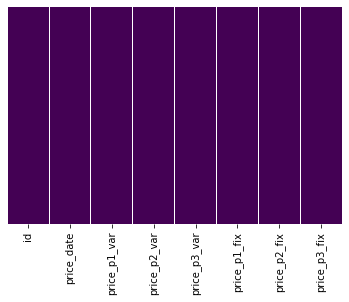

In [41]:
sns.heatmap(history.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='has_gas', ylabel='count'>

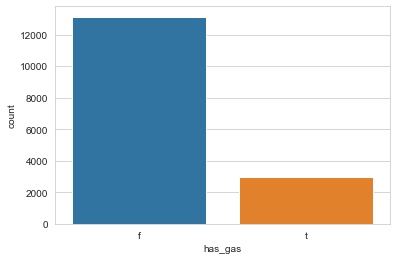

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='has_gas',data=train)

<AxesSubplot:>

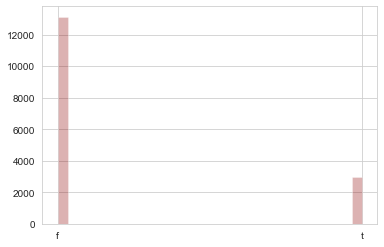

In [43]:
train['has_gas'].hist(bins=30,color='darkred',alpha=0.3)

In [44]:
def impute_nan(train,variable):
    most_frequent_category=train[variable].mode()[0]
    train[variable].fillna(most_frequent_category,inplace=True)

In [45]:
for feature in ['date_end', 'date_modif_prod','date_renewal','origin_up']:
    impute_nan(train,feature)

In [46]:
train.drop('activity_new',inplace=True,axis=1)

In [47]:
train.drop('campaign_disc_ele',inplace=True,axis=1)

In [48]:
train.drop('channel_sales',inplace=True,axis=1)

In [49]:
train.drop('date_first_activ',inplace=True,axis=1)

In [50]:
train.isnull().sum()

id                          0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_base_bill_ele      0
forecast_base_bill_year     0
forecast_bill_12m           0
forecast_cons               0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
dtype: int64

<AxesSubplot:>

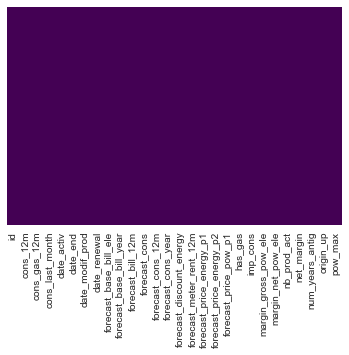

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

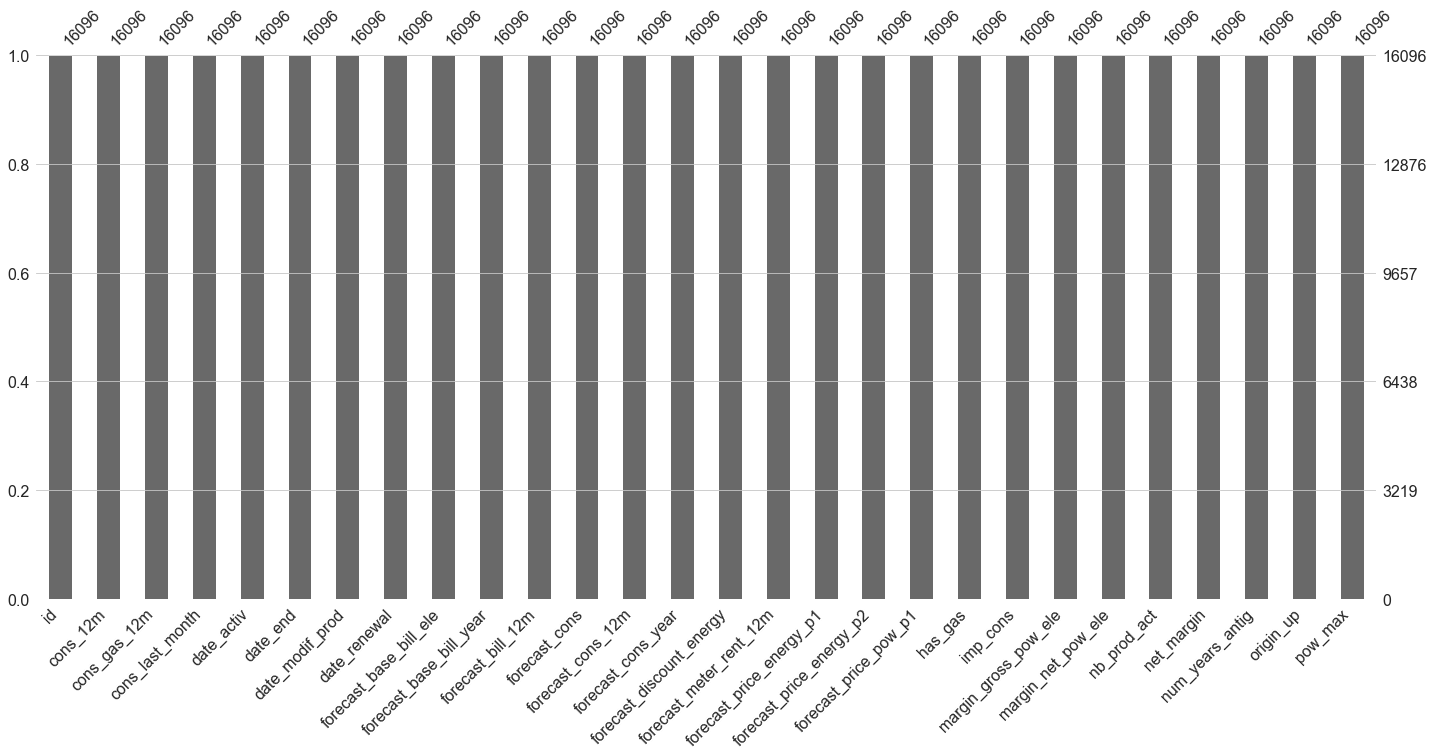

In [52]:
# Visualize the completeness of the dataframe
msno.bar(train)

<AxesSubplot:>

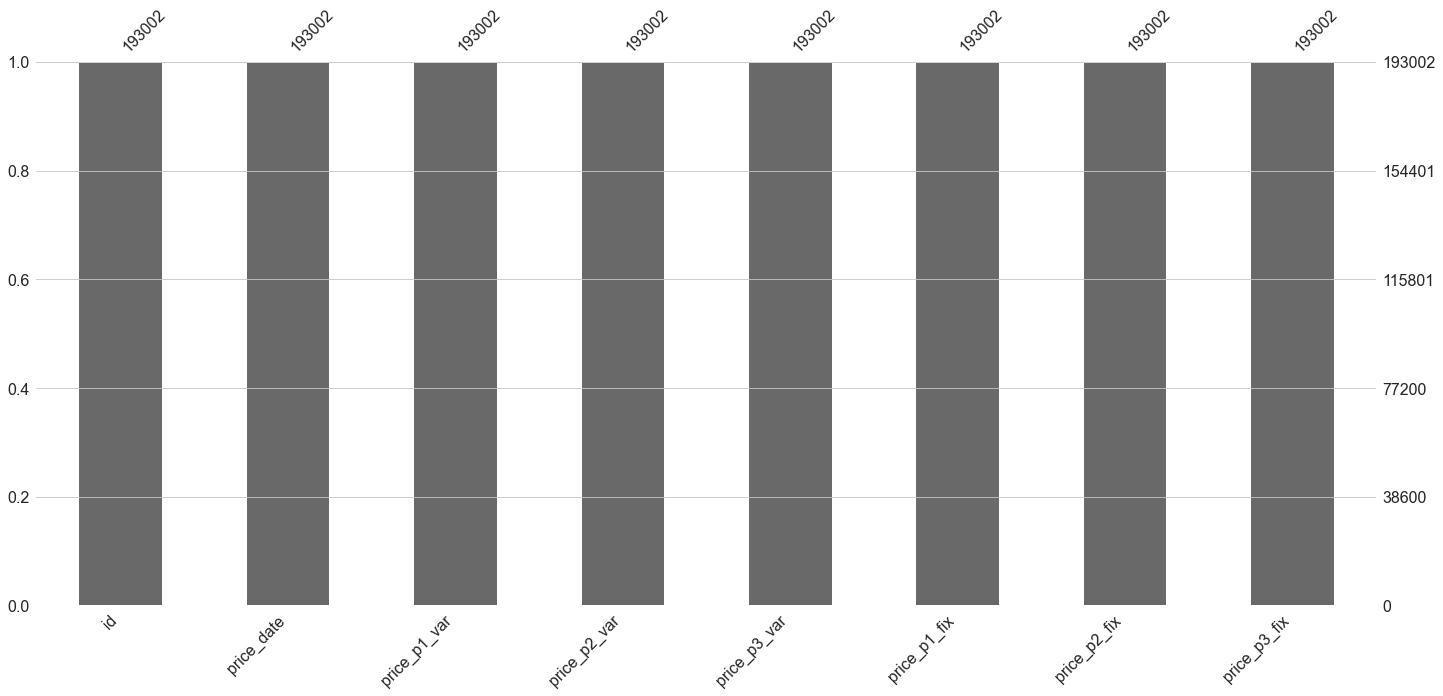

In [53]:
# Visualize the completeness of the dataframe
msno.bar(history)